# Libraries for Neural Networks - TensorFlow (image classification)

## Loading the dataset

In [1]:
import tensorflow
tensorflow.__version__

'2.4.1'

In [2]:
tensorflow.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
gpus= tensorflow.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tensorflow.config.experimental.set_memory_growth(gpus[0], True)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.utils as utils
from tensorflow.keras.datasets import mnist

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Text(0.5, 1.0, 'Class: 5')

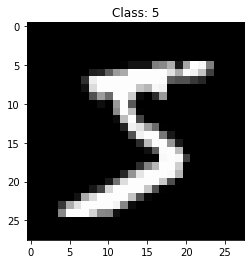

In [7]:
plt.imshow(X_train[0], cmap='gray')
plt.title('Class: ' + str(y_train[0]))

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train = X_train.reshape(60000, 28 * 28)
X_train.shape

(60000, 784)

In [10]:
X_train[0].shape

(784,)

In [11]:
X_test.shape

(10000, 28, 28)

In [12]:
X_test = X_test.reshape(10000, 28 * 28)
X_test.shape

(10000, 784)

In [13]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
X_train[0].shape

(784,)

In [15]:
X_train /= 255
X_test /= 255

In [16]:
X_train.max()

1.0

In [17]:
X_train.min()

0.0

In [18]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [21]:
y_train = utils.to_categorical(y_train)

In [22]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [23]:
y_test = utils.to_categorical(y_test)
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Neural network (training)

In [24]:
(784 + 10) / 2

397.0

In [25]:
# 784 -> 397 -> 397 -> 10
network = Sequential()
network.add(Dense(input_shape = (784,), units = 397, activation = 'relu'))
network.add(Dense(units=397, activation='relu'))
network.add(Dense(units = 10, activation='softmax'))

In [26]:
network.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [27]:
history = network.fit(X_train, y_train, batch_size=128, epochs=10)

Epoch 1/10
469/469 [==============================] - 4s 4ms/step - loss: 0.4273 - accuracy: 0.8766
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0837 - accuracy: 0.9748
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0540 - accuracy: 0.9836
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0334 - accuracy: 0.9896
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0256 - accuracy: 0.9916
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0205 - accuracy: 0.9931
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0173 - accuracy: 0.9945
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0157 - accuracy: 0.9943
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0126 - accuracy: 0.9960
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0119 - accuracy: 0.9960

## Neural network (evaluation)

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

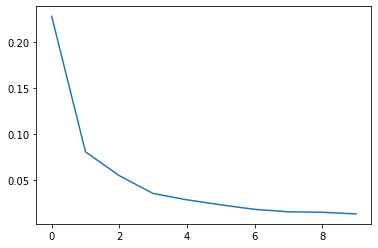

In [29]:
plt.plot(history.history['loss'])

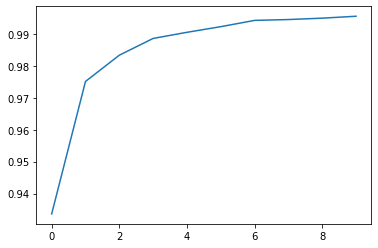

In [30]:
plt.plot(history.history['accuracy'])

In [31]:
accuracy_test = network.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0857 - accuracy: 0.9798


In [32]:
predictions = network.predict(X_test)

In [33]:
predictions[0]

array([5.7938425e-11, 5.1251440e-08, 3.8222612e-09, 9.0378798e-09,
       2.2129284e-12, 7.8398425e-12, 1.9346239e-13, 9.9999976e-01,
       2.0128374e-10, 8.9806448e-08], dtype=float32)

In [34]:
np.argmax(predictions[0])

7

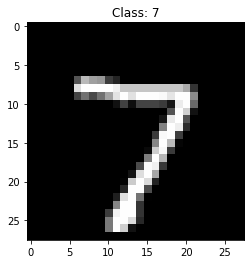

In [36]:
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title('Class: ' + str(np.argmax(y_test[0])))
plt.show()